In [20]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
adammaus_predicting_churn_for_bank_customers_path = kagglehub.dataset_download('adammaus/predicting-churn-for-bank-customers')

print('Data source import complete.')


Data source import complete.


<img src="https://s16353.pcdn.co/wp-content/uploads/2018/06/Churn.png" style="float: left;" width="400" height="100" />
# PREVENTING BANK CUSTOMER CHURN!
# " Exploratory Data Analysis  & Prediction!"

# 2018

[** by_Keldine Malit** ]

 ## 1. Introduction

We aim to accomplist the following for this study:

1. Identify and visualize which factors contribute to customer churn:
    
2. Build a prediction model that will perform the following:
    * Classify if a customer is going to churn or not
    * Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## 2. Data set review & preparation

In this section we will seek to explore the structure of our data:
1. To understand the input space the data set
2. And to prepare the sets for exploratory and prediction tasks as described in section 1

In [21]:
## REQUIRED LIBRARIES
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [22]:
import pandas as pd
import os

# Define path to Downloads folder on Mac
downloads_path = os.path.expanduser('~/Downloads/Churn_Modelling.csv')

# Read the data
df = pd.read_csv(downloads_path)
print(df.shape)

(10000, 14)


The Df has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [23]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Well isn't that a rare find; no missing values!

In [24]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [25]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [26]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


From the above, a couple of question linger:
1. The data appears to be a snapshot as some point in time e.g. the balance is for a given date which leaves a lot of questions:
    * What date is it and of what relevance is this date
    * Would it be possible to obtain balances over a period of time as opposed to a single date.
2. There are customers who have exited but still have a balance in their account! What would this mean? Could they have exited from a product and not the bank?
3. What does being an active member mean and are there difference degrees to it? Could it be better to provide transaction count both in terms of credits and debits to the account instead?
4. A break down to the products bought into by a customer could provide more information topping listing of product count

For this exercise, we proceed to model without context even though typically having context and better understanding of the data extraction process would give better insight and possibly lead to better and contextual results of the modelling process

In [27]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we moslty have categorical variables and 5 continuous variables

## 3. Exploratory Data Analysis
Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.

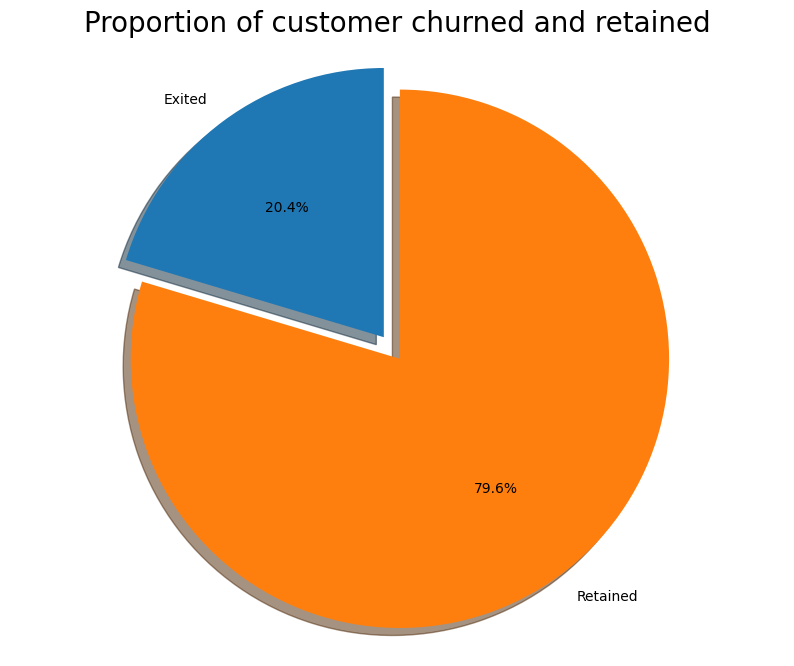

In [28]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn.
Given 20% is a small number,  we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

<Axes: xlabel='IsActiveMember', ylabel='count'>

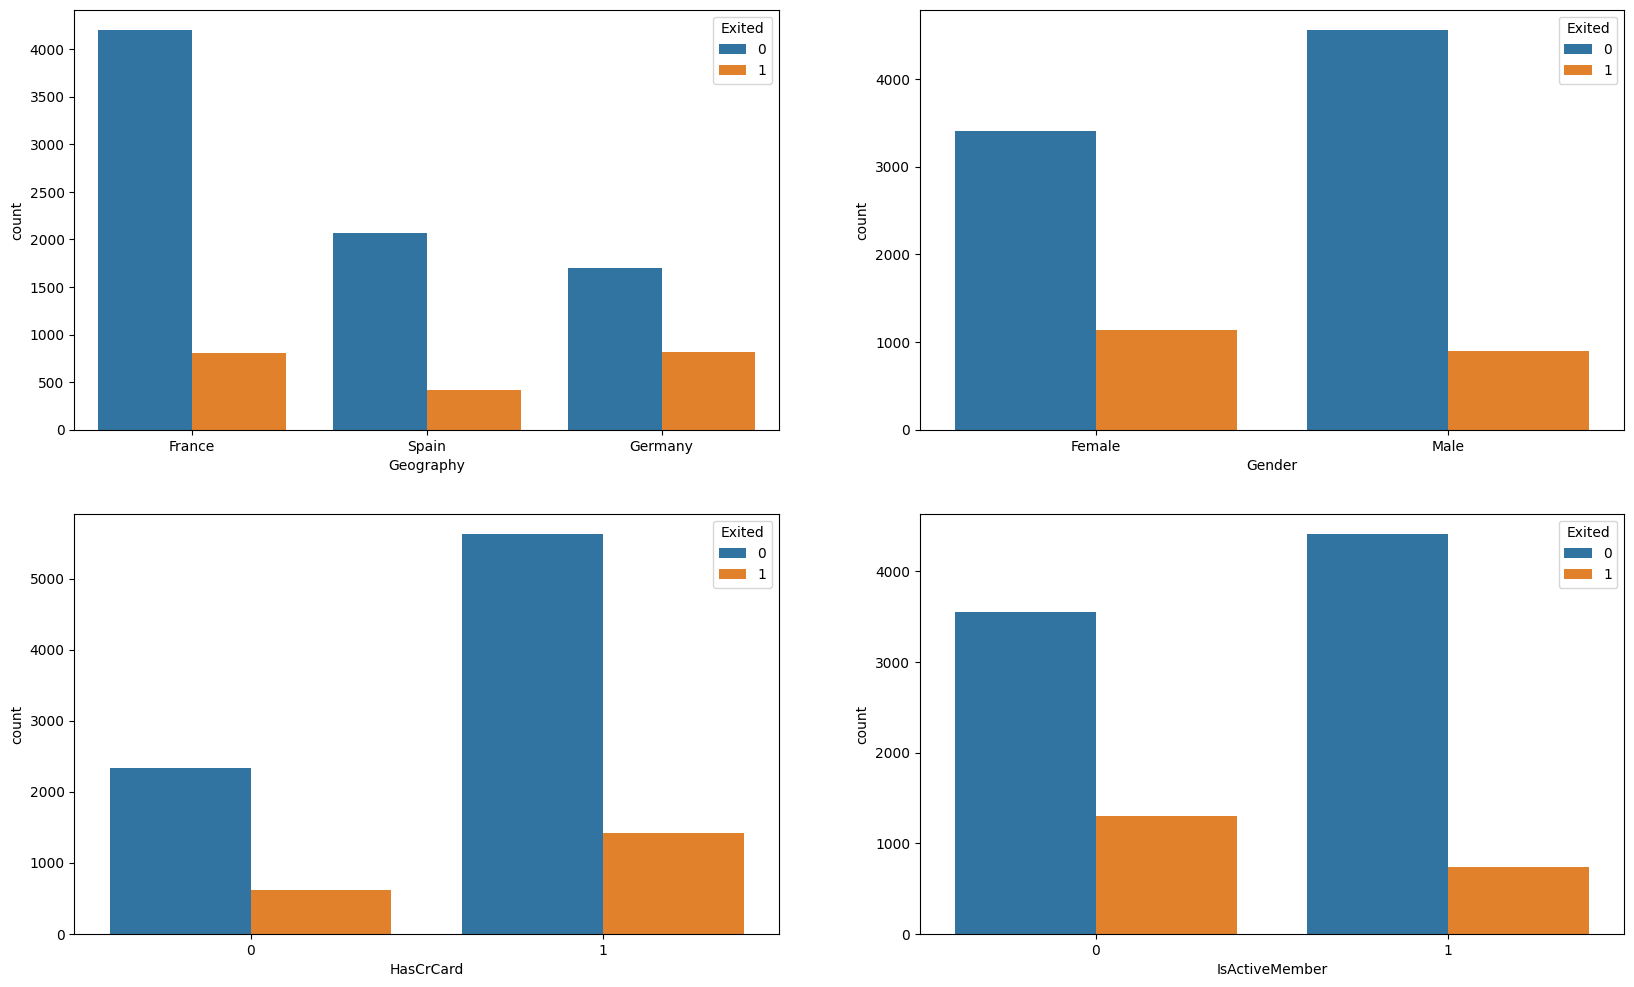

In [29]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

We note the following:
* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

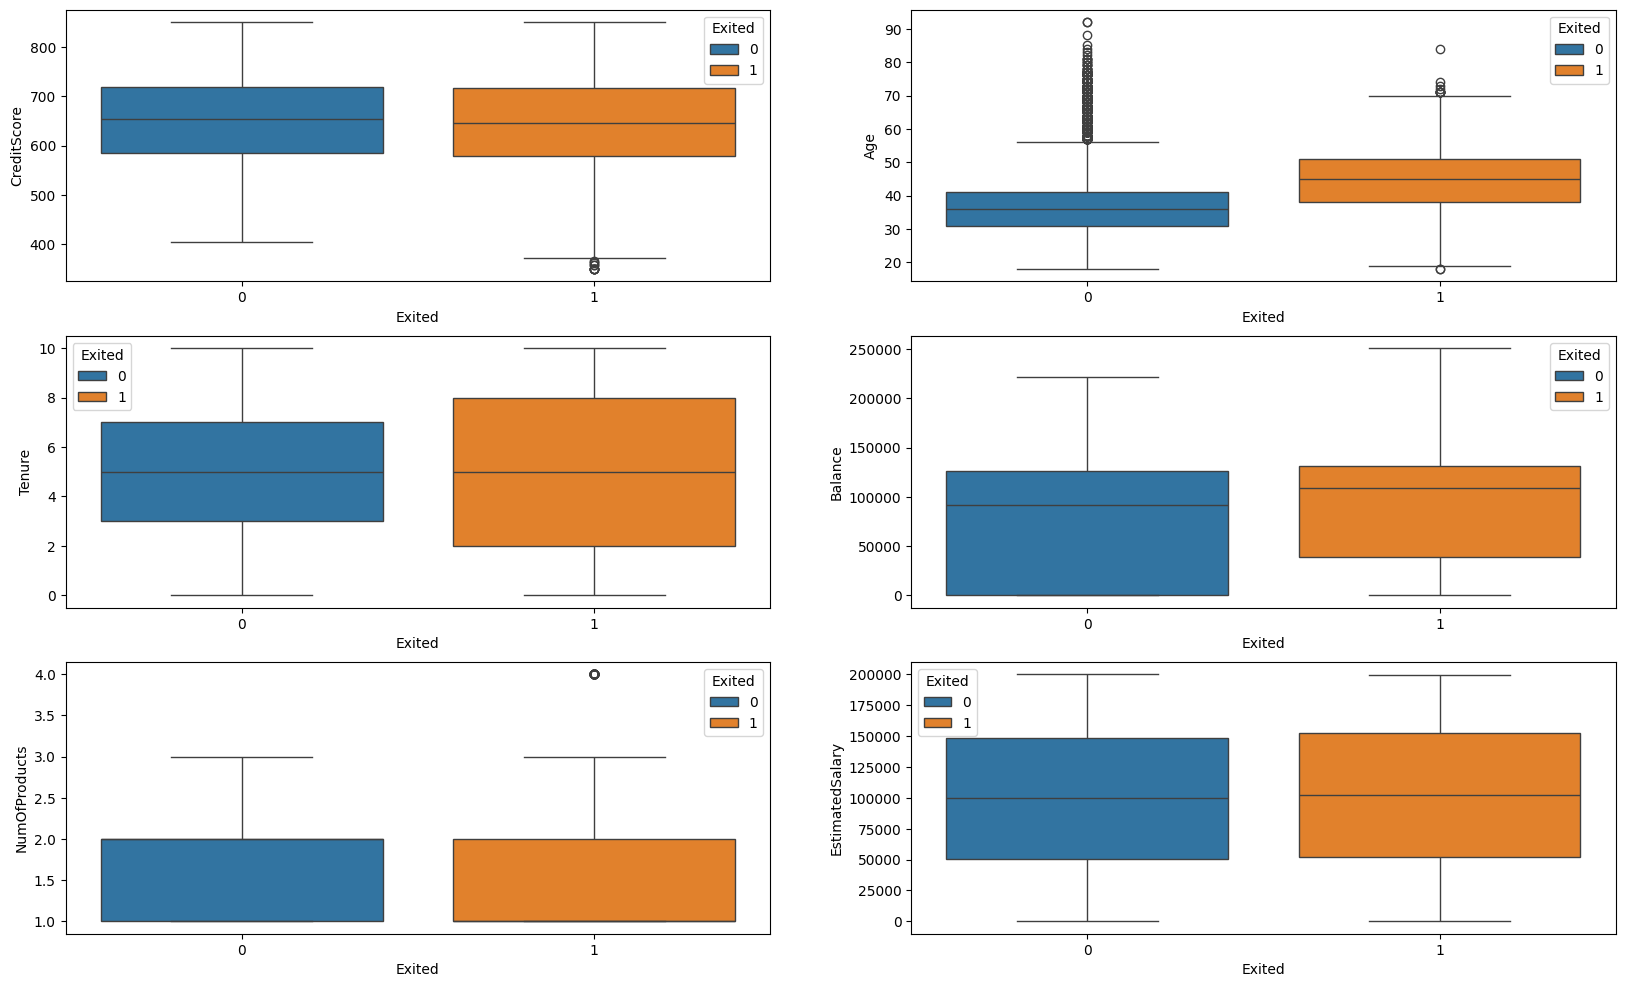

In [30]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

We note the following:
* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
*  Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

## 4. Feature engineering
We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [31]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

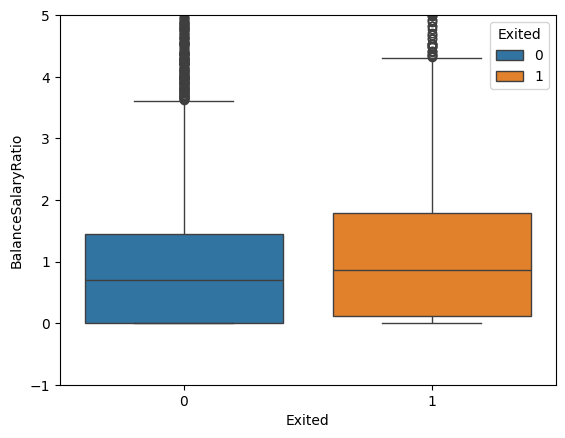

In [32]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

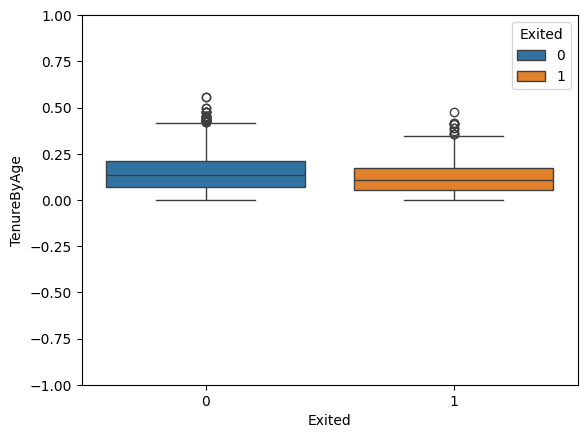

In [33]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [34]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [35]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


## 5. Data prep for model fitting

In [17]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [36]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation
where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,-1,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,-1,1,155643.04,0,0.857741,0.147059,18.764706


In [38]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == np.object_):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,461,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000,1,-1,-1,1,-1
6332,619,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714,-1,1,-1,1,-1
8895,699,40,8,122038.34,1,1,-1,102085.35,0,1.195454,0.200000,17.475000,-1,1,-1,1,-1
5351,558,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756,-1,-1,1,-1,1
4314,638,34,5,133501.36,1,-1,1,155643.04,0,0.857741,0.147059,18.764706,-1,1,-1,-1,1


In [39]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0.222,0.094595,0.6,0.000000,0.333333,1,1,0.076118,0,0.000000,0.432000,0.323157,1,-1,-1,1,-1
6332,0.538,0.229730,0.4,0.360358,0.000000,1,1,0.102376,0,0.003317,0.205714,0.305211,-1,1,-1,1,-1
8895,0.698,0.297297,0.8,0.486406,0.000000,1,-1,0.510225,0,0.000901,0.360000,0.300198,-1,1,-1,1,-1
5351,0.416,0.310811,0.2,0.495130,0.000000,1,1,0.555744,0,0.000843,0.087805,0.208238,-1,-1,1,-1,1
4314,0.576,0.216216,0.5,0.532094,0.000000,-1,1,0.778145,0,0.000647,0.264706,0.330882,-1,1,-1,-1,1


In [40]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"]
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

## 6. Model fitting and selection
For the model fitting, I will try out the following
* Logistic regression in the primal space and with different kernels
* SVM in the primal and with different Kernels
* Ensemble models

In [41]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [43]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

## !Warning. This section takes a loooooong time to run so you have the option to skip to the next section where I fit the better models from this section.

In [44]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.815625
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=250)


In [45]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Exited)
best_model(log_pol2_Grid)

0.8553750000000001
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-06}
LogisticRegression(C=50, max_iter=300, solver='liblinear', tol=1e-06)


In [46]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

0.8518747140853454
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [47]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

0.8544999485716948
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [48]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

0.8628750000000001
{'max_depth': 8, 'max_features': 6, 'min_samples_split': 7, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=7,
                       n_estimators=50)


In [49]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(xgb_grid)

0.8627500000000001
{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.01, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


### Fit best Models

In [51]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True, 
                               intercept_scaling=1, max_iter=250, multi_class='auto', n_jobs=None,
                               penalty='l2', random_state=None, solver='lbfgs', tol=1e-05, 
                               verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100, max_iter=250, multi_class='auto', tol=1e-05)

In [55]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                             max_iter=300, multi_class='auto', n_jobs=None,
                             penalty='l2', random_state=None, solver='liblinear', tol=0.0001, 
                             verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2, df_train.Exited)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, max_iter=300, multi_class='auto', solver='liblinear')

In [56]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [57]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [59]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=8, 
                           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, 
                           n_estimators=50, n_jobs=None, oob_score=False, random_state=None, 
                           verbose=0, warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [60]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:31:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=1, nthread=None, ...)

### Review best model fit accuracy : Keen interest is on the performance in predicting 1's (Customers who churn)

In [61]:
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.34      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [62]:
print(classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [63]:
print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [64]:
print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [65]:
print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.53      0.66      1647

    accuracy                           0.89      8000
   macro avg       0.88      0.76      0.80      8000
weighted avg       0.89      0.89      0.88      8000



In [67]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=5,
    n_estimators=20,
    objective='binary:logistic',
    random_state=0,
    verbosity=0
)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, ...)

In [68]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

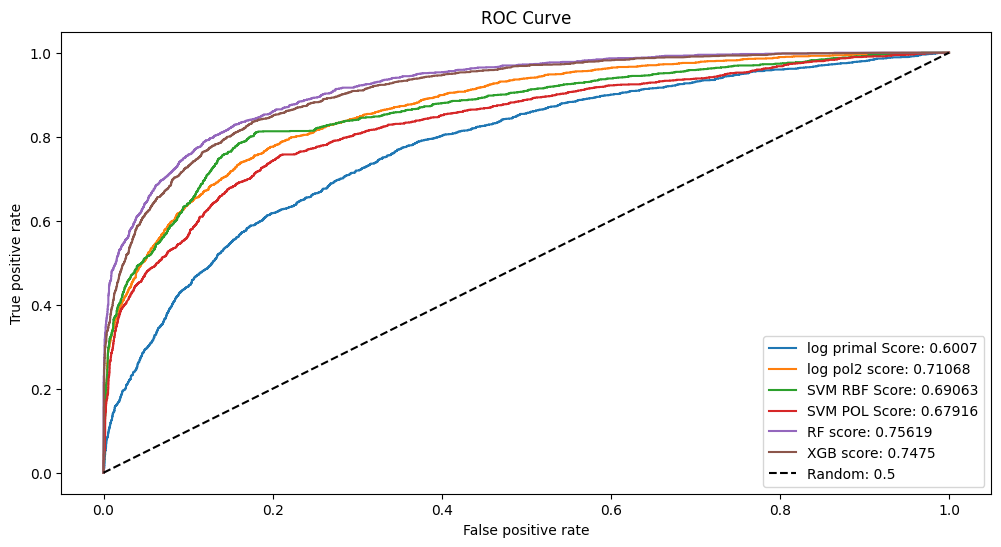

In [69]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.

### Given that in the data we only had 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

### From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

### Test model prediction accuracy on test data

In [70]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

/var/folders/yy/tk2ly86d08v223l5878trg9m0000gn/T/ipykernel_22964/3095303468.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
/var/folders/yy/tk2ly86d08v223l5878trg9m0000gn/T/ipykernel_22964/3095303468.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
/var/folders/yy/tk2ly86d08v223l5878trg9m0000gn/T/ipykernel_22964/3095303468.py:20: SettingWithCopyWarning: 
A value is trying to be set on a c

(1996, 17)

In [71]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.80      0.41      0.54       389

    accuracy                           0.86      1996
   macro avg       0.84      0.69      0.73      1996
weighted avg       0.86      0.86      0.85      1996



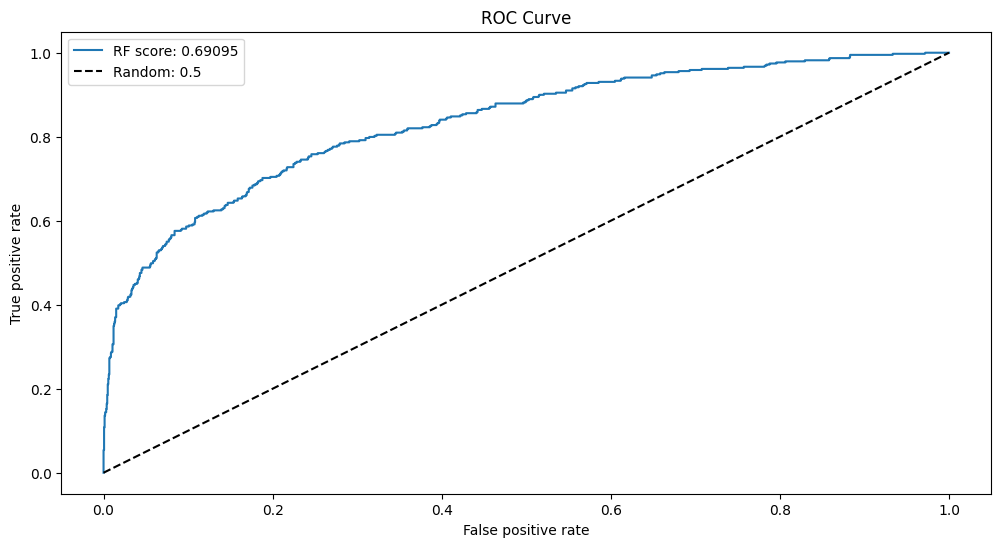

In [72]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

## 7. Conclusion

The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned :-)

In [73]:
# ── Cell: Apply SMOTE to your training set ──
from imblearn.over_sampling import SMOTE

# Extract features & target from df_train
X_train = df_train.drop(columns='Exited')
y_train = df_train['Exited']

# Balance via SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE, class counts:\n", pd.Series(y_train_res).value_counts())

After SMOTE, class counts:
 Exited
0    6353
1    6353
Name: count, dtype: int64


In [74]:
# ── Cell: SVM on SMOTE’d data ──
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# RBF‑kernel SVM (tweak hyperparams as you like)
svm = SVC(C=100, kernel='rbf', gamma=0.1, probability=True, random_state=42)
svm.fit(X_train_res, y_train_res)

# Evaluate on df_test
X_test = df_test.drop(columns='Exited')
y_test = df_test['Exited']

y_pred   = svm.predict(X_test)
y_proba  = svm.predict_proba(X_test)[:,1]
print("SVM Classification Report:\n", classification_report(y_test, y_pred))
print("SVM Test AUC:", roc_auc_score(y_test, y_proba))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.35      0.50      1607
           1       0.24      0.83      0.37       389

    accuracy                           0.44      1996
   macro avg       0.57      0.59      0.44      1996
weighted avg       0.77      0.44      0.48      1996

SVM Test AUC: 0.6122763040233682


In [75]:
# ── Cell: Random Forest on SMOTE’d data ──
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_depth=8,
    max_features=6,
    min_samples_split=3,
    n_estimators=50,
    random_state=42
)
RF.fit(X_train_res, y_train_res)

y_pred  = RF.predict(X_test)
y_proba = RF.predict_proba(X_test)[:,1]
print("RF Classification Report:\n", classification_report(y_test, y_pred))
print("RF Test AUC:", roc_auc_score(y_test, y_proba))

RF Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      1607
           1       0.55      0.63      0.59       389

    accuracy                           0.83      1996
   macro avg       0.73      0.75      0.74      1996
weighted avg       0.84      0.83      0.83      1996

RF Test AUC: 0.8496919806182143


In [76]:
# ── Cell: XGBoost on SMOTE’d data ──
from xgboost import XGBClassifier

XGB = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=5,
    n_estimators=20,
    objective='binary:logistic',
    random_state=42,
    verbosity=0
)
XGB.fit(X_train_res, y_train_res)

y_pred  = XGB.predict(X_test)
y_proba = XGB.predict_proba(X_test)[:,1]
print("XGB Classification Report:\n", classification_report(y_test, y_pred))
print("XGB Test AUC:", roc_auc_score(y_test, y_proba))

XGB Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1607
           1       0.52      0.66      0.58       389

    accuracy                           0.81      1996
   macro avg       0.71      0.75      0.73      1996
weighted avg       0.83      0.81      0.82      1996

XGB Test AUC: 0.847118887003038


In [77]:
# ── Cell: LightGBM on SMOTE’d data ──
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate & train
lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)
lgbm.fit(X_train_res, y_train_res)

# Predict & evaluate on test set
y_pred_lgbm  = lgbm.predict(X_test)
y_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print(f"LightGBM Test AUC: {roc_auc_score(y_test, y_proba_lgbm):.4f}")

[LightGBM] [Info] Number of positive: 6353, number of negative: 6353
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 12706, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classification Report:
              pre

In [104]:
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm, digits=4))
print(f"LightGBM Test AUC: {roc_auc_score(y_test, y_proba_lgbm):.4f}")

LightGBM Classification Report:
              precision    recall  f1-score   support

           0     0.8984    0.9135    0.9059      1607
           1     0.6160    0.5733    0.5939       389

    accuracy                         0.8472      1996
   macro avg     0.7572    0.7434    0.7499      1996
weighted avg     0.8434    0.8472    0.8451      1996

LightGBM Test AUC: 0.8416


In [79]:
!pip3 install tensorflow


4125.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.8 MB/s eta 0:00:00
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/252.7 MB 4.1 MB/s eta 0:00:58
ERROR: Exception:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^

In [83]:
# ── Cell: Feed‑Forward Neural Network via Keras ──
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# 1) Scale features
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_res)
X_test_nn  = scaler.transform(X_test)

# 2) Build model
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# 3) Early stopping on validation AUC
es = EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# 4) Train
history = nn.fit(
    X_train_nn, y_train_res,
    validation_data=(X_test_nn, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

# 5) Evaluate
y_proba_nn = nn.predict(X_test_nn).ravel()
y_pred_nn  = (y_proba_nn > 0.5).astype(int)

print("Neural Net Classification Report:")
print(classification_report(y_test, y_pred_nn))
print(f"Neural Net Test AUC: {roc_auc_score(y_test, y_proba_nn):.4f}")

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.6906 - loss: 0.6320 - val_AUC: 0.7622 - val_loss: 0.4687
Epoch 2/100
236/398 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - AUC: 0.7974 - loss: 0.5530

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - AUC: 0.8015 - loss: 0.5473 - val_AUC: 0.7822 - val_loss: 0.4357
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - AUC: 0.8387 - loss: 0.5033 - val_AUC: 0.8073 - val_loss: 0.3944
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - AUC: 0.8482 - loss: 0.4833 - val_AUC: 0.8174 - val_loss: 0.3805
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.8656 - loss: 0.4583 - val_AUC: 0.8275 - val_loss: 0.3826
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - AUC: 0.8622 - loss: 0.4646 - val_AUC: 0.8301 - val_loss: 0.3828
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.8692 - loss: 0.4528 - val_AUC: 0.8347 - val_loss: 0.4022
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - AUC: 0.8663 - loss: 0.4583 - val_AUC: 0.8343 - val_loss: 0.4010
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - AUC: 0.8693 - loss: 0.4527 - val_AUC: 0.8344 - val_loss: 0.3979
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s

In [82]:
!pip3 install tensorflow

4317.82s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp312-cp312-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-

In [ ]:
# ── Cell: Improved Neural Network ──
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# 1) Scale data
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_res)
X_test_nn  = scaler.transform(X_test)

# 2) Build deeper model with BatchNorm & Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# 3) Compile with a slightly lower LR
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

# 4) Callbacks for best‐model & LR scheduling
callbacks = [
    EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_auc', mode='max', factor=0.5, patience=5, min_lr=1e-6)
]

# 5) Train
history = model.fit(
    X_train_nn, y_train_res,
    validation_data=(X_test_nn, y_test),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)
  
# 6) Evaluate on test set
y_proba_nn = model.predict(X_test_nn).ravel()
y_pred_nn  = (y_proba_nn > 0.5).astype(int)

print("Neural Net Classification Report:")
print(classification_report(y_test, y_pred_nn))
print(f"Neural Net Test AUC: {roc_auc_score(y_test, y_proba_nn):.4f}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.6761 - loss: 0.7127 - val_AUC: 0.7640 - val_loss: 0.4753 - learning_rate: 0.0010
Epoch 2/100
144/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7600 - loss: 0.5922

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7681 - loss: 0.5817 - val_AUC: 0.7827 - val_loss: 0.4375 - learning_rate: 0.0010
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8151 - loss: 0.5282 - val_AUC: 0.7982 - val_loss: 0.4095 - learning_rate: 0.0010
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8322 - loss: 0.5079 - val_AUC: 0.8137 - val_loss: 0.4238 - learning_rate: 0.0010
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8414 - loss: 0.4951 - val_AUC: 0.8159 - val_loss: 0.4038 - learning_rate: 0.0010
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8415 - loss: 0.4928 - val_AUC: 0.8277 - val_loss: 0.4096 - learning_rate: 0.0010
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8498 - loss: 0.4832 - val_AUC: 0.8264 - val_loss: 0.4045 - learning_rate: 0.0010
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8598 - loss: 0.4665 - val_AUC: 0.8244 - val_loss: 0.4294 - learning_rate: 0.0010
Epoch 9/100

In [108]:
print("Neural Net Classification Report:")
print(classification_report(y_test, y_pred_nn, digits=4))
print(f"Neural Net Test AUC: {roc_auc_score(y_test, y_proba_nn):.4f}")

Neural Net Classification Report:
              precision    recall  f1-score   support

           0     0.9017    0.7760    0.8341      1607
           1     0.4127    0.6504    0.5050       389

    accuracy                         0.7515      1996
   macro avg     0.6572    0.7132    0.6696      1996
weighted avg     0.8064    0.7515    0.7700      1996

Neural Net Test AUC: 0.7933


In [101]:
# ── Cell: CatBoost on SMOTE’d data ──
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 1) Instantiate CatBoost
cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    eval_metric='AUC',
    verbose=0
)

# 2) Train on SMOTE’d data
cat.fit(X_train_res, y_train_res,
        eval_set=(X_test, y_test),       # optional validation set for early stopping
        early_stopping_rounds=50)

# 3) Predict & evaluate on test set
y_pred_cat  = cat.predict(X_test)
y_proba_cat = cat.predict_proba(X_test)[:, 1]

print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))
print(f"CatBoost Test AUC: {roc_auc_score(y_test, y_proba_cat):.7f}")

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.63      0.59      0.61       389

    accuracy                           0.85      1996
   macro avg       0.77      0.75      0.76      1996
weighted avg       0.85      0.85      0.85      1996

CatBoost Test AUC: 0.8609586


In [102]:
print(f"CatBoost Test AUC: {roc_auc_score(y_test, y_proba_cat):.4f}")

CatBoost Test AUC: 0.8610


In [103]:
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat, digits=4))
print(f"CatBoost Test AUC: {roc_auc_score(y_test, y_proba_cat):.4f}")

CatBoost Classification Report:
              precision    recall  f1-score   support

           0     0.9021    0.9179    0.9099      1607
           1     0.6343    0.5887    0.6107       389

    accuracy                         0.8537      1996
   macro avg     0.7682    0.7533    0.7603      1996
weighted avg     0.8500    0.8537    0.8516      1996

CatBoost Test AUC: 0.8610


In [88]:
# ── Cell: XGBoost with RandomizedSearchCV on SMOTE’d data ──
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 1. Define parameter distributions for RandomizedSearchCV
param_dist = {
    'max_depth': randint(3, 10),
    'gamma': uniform(0, 0.5),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# 2. Set up RandomizedSearchCV with recall as the focus
xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',      # Focus on improving recall (sensitivity)
    cv=5,                  # 5-fold stratified CV
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# 3. Fit the model on SMOTE-resampled training data
xgb_random.fit(X_train_res, y_train_res)

# 4. Inspect the best results (best recall score & best parameters)
print("Best recall on CV:", xgb_random.best_score_)
print("Best parameters:", xgb_random.best_params_)

# 5. Use the best estimator for predictions
best_xgb = xgb_random.best_estimator_

# Predict and evaluate on the test set
y_proba = best_xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.5).astype(int)

# Classification report and AUC score
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   0.2s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   0.2s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   0.2s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   0.2s
[CV] END

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:44] WARN

[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   0.5s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   0.7s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   2.1s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   2.0s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.4s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:46] WARN

[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   2.4s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.6s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.7s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.7s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.7s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:47] WARN

[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.4s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.4s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.0792681476866447, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=   1.1s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.4s
[CV] END c

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:48] WARN

[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.0792681476866447, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.5s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.6s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.0792681476866447, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   0.7s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   1.0s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   0.9s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   0.9s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   1.0s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   1.0s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.29835160730480476, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:50] WARN

[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.29835160730480476, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=   1.7s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.29835160730480476, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=   1.8s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   0.6s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.29835160730480476, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=   1.9s
[CV] E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:51] WARN

[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.014223946814525337, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   0.7s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.014223946814525337, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   0.6s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.014223946814525337, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   0.6s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.28448790266313423, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.28448790266313423, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   0.3s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.28448790266313423, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   0.3s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.28448790266313423, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   0.3s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.28448790266313423, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:51] WARN

[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.014223946814525337, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   0.8s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.1s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.1s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.1s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:52] WARN

[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.08079547592468672, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=   1.5s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.4s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.4s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.3s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.3s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.08079547592468672, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=   1.7s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.08079547592468672, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:53] WARN

[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.08079547592468672, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=   1.7s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.6s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.08079547592468672, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.5s
[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.07091836742043081, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=   1.6s
[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.07091836742043081, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.6s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.7s
[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.07091836742043081, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=   1.6s
[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.07091836742043081, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=   1.6s
[CV] END c

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:54] WARN

[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   0.8s
[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   0.7s
[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   1.1s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.07562926587192106, max_depth=3, n_estimators=229, reg_alpha=0.363629602379294, reg_lambda=0.9717820827209607, subsample=0.9849789179768444; total time=   1.0s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.4s
[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:57] WARN

[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.7s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.6s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.6s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:57] WARN

[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.07562926587192106, max_depth=3, n_estimators=229, reg_alpha=0.363629602379294, reg_lambda=0.9717820827209607, subsample=0.9849789179768444; total time=   0.9s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.07562926587192106, max_depth=3, n_estimators=229, reg_alpha=0.363629602379294, reg_lambda=0.9717820827209607, subsample=0.9849789179768444; total time=   0.8s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.07562926587192106, max_depth=3, n_estimators=229, reg_alpha=0.363629602379294, reg_lambda=0.9717820827209607, subsample=0.9849789179768444; total time=   0.7s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.07562926587192106, max_depth=3, n_estimators=229, reg_alpha=0.363629602379294, reg_lambda=0.9717820827209607, subsample=0.9849789179768444; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7007129183301457, gamma=0.24862425294619273, learning_rate=0.1002634929450309, max_depth=3, n_estimators=233, reg_alpha=0.036886947354532795, reg_lambda=0.6095643339798968, subsample=0.8010716092915446; total time=   0.6s
[CV] END colsample_bytree=0.7007129183301457, gamma=0.24862425294619273, learning_rate=0.1002634929450309, max_depth=3, n_estimators=233, reg_alpha=0.036886947354532795, reg_lambda=0.6095643339798968, subsample=0.8010716092915446; total time=   0.6s
[CV] END colsample_bytree=0.7007129183301457, gamma=0.24862425294619273, learning_rate=0.1002634929450309, max_depth=3, n_estimators=233, reg_alpha=0.036886947354532795, reg_lambda=0.6095643339798968, subsample=0.8010716092915446; total time=   0.7s
[CV] END colsample_bytree=0.7007129183301457, gamma=0.24862425294619273, learning_rate=0.1002634929450309, max_depth=3, n_estimators=233, reg_alpha=0.036886947354532795, reg_lambda=0.6095643339798968, subsample=0.8010716092915446; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:58] WARN

[CV] END colsample_bytree=0.6205915004999957, gamma=0.13932323211830572, learning_rate=0.2824797657899961, max_depth=5, n_estimators=175, reg_alpha=0.1448948720912231, reg_lambda=0.489452760277563, subsample=0.9942601816442402; total time=   0.4s
[CV] END colsample_bytree=0.6205915004999957, gamma=0.13932323211830572, learning_rate=0.2824797657899961, max_depth=5, n_estimators=175, reg_alpha=0.1448948720912231, reg_lambda=0.489452760277563, subsample=0.9942601816442402; total time=   0.5s
[CV] END colsample_bytree=0.6968221086046001, gamma=0.3360677737029393, learning_rate=0.23848588459861528, max_depth=5, n_estimators=194, reg_alpha=0.7282163486118596, reg_lambda=0.3677831327192532, subsample=0.8529223322374317; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0.6s
[CV] END colsample_bytree=0.6968221086046001, gamma=0.3360677737029393, learning_rate=0.23848588459861528, max_depth=5, n_estimators=194, reg_alpha=0.7282163486118596, reg_lambda=0.3677831327192532, subsample=0.8529223322374317; total time=   0.6s
[CV] END colsample_bytree=0.6968221086046001, gamma=0.3360677737029393, learning_rate=0.23848588459861528, max_depth=5, n_estimators=194, reg_alpha=0.7282163486118596, reg_lambda=0.3677831327192532, subsample=0.8529223322374317; total time=   0.8s
[CV] END colsample_bytree=0.6968221086046001, gamma=0.3360677737029393, learning_rate=0.23848588459861528, max_depth=5, n_estimators=194, reg_alpha=0.7282163486118596, reg_lambda=0.3677831327192532, subsample=0.8529223322374317; total time=   0.9s
[CV] 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:59] WARN

[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0.8s
[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   1.2s
[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   1.2s
[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   1.3s
[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:00] WARN

[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   1.2s
[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   1.4s
[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   0.8s
[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   0.9s
[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   0.7s
[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   1.1s
[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   1.1s
[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARN

[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   0.7s
[CV] END colsample_bytree=0.9588863031813307, gamma=0.4502090285816652, learning_rate=0.1999304371819804, max_depth=3, n_estimators=282, reg_alpha=0.3492095746126609, reg_lambda=0.7259556788702394, subsample=0.9588441039810308; total time=   0.6s
[CV] END colsample_bytree=0.9588863031813307, gamma=0.4502090285816652, learning_rate=0.1999304371819804, max_depth=3, n_estimators=282, reg_alpha=0.3492095746126609, reg_lambda=0.7259556788702394, subsample=0.9588441039810308; total time=   0.7s
[CV] END colsample_bytree=0.9588863031813307, gamma=0.4502090285816652, learning_rate=0.1999304371819804, max_depth=3, n_estimators=282, reg_alpha=0.3492095746126609, reg_lambda=0.7259556788702394, subsample=0.9588441039810308; total time=   0.5s
[CV] END 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:02] WARN

[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   0.7s
[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   0.7s
[CV] END colsample_bytree=0.9588863031813307, gamma=0.4502090285816652, learning_rate=0.1999304371819804, max_depth=3, n_estimators=282, reg_alpha=0.3492095746126609, reg_lambda=0.7259556788702394, subsample=0.9588441039810308; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   0.7s
[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   0.7s
[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   0.5s
[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   1.1s
[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   1.3s
[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   0.6s
[C

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARN

[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   1.3s
[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   1.3s
[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   1.5s
[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   0.5s
[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   0.6s
[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   0.4s
[CV] END colsample_bytree=0.9396893641976711, gamma=0.3288064461501717, learning_rate=0.1804925810006415, max_depth=6, n_estimators=236, reg_alpha=0.3677158030594335, reg_lambda=0.26520236768172545, subsample=0.6975958573516334; total time=   1.5s
[CV] END colsample_bytree=0.9396893641976711, gamma=0.3288064461501717, learning_rate=0.1804925810006415, max_depth=6, n_estimators=236, reg_alpha=0.3677158030594335, reg_lambda=0.26520236768172545, subsample=0.6975958573516334; total time=   1.2s
[CV] END colsample_bytree=0.7970070775275455, gamma=0.09762149389902225, learning_rate=0.2267356345784516, max_depth=5, n_estimators=53, reg_alpha=0.02431596643145384, reg_lambda=0.6454722959071678, subsample=0.6708442717628196; total time=   0.3s
[CV] END co

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:04] WARN

[CV] END colsample_bytree=0.7970070775275455, gamma=0.09762149389902225, learning_rate=0.2267356345784516, max_depth=5, n_estimators=53, reg_alpha=0.02431596643145384, reg_lambda=0.6454722959071678, subsample=0.6708442717628196; total time=   0.2s
[CV] END colsample_bytree=0.9396893641976711, gamma=0.3288064461501717, learning_rate=0.1804925810006415, max_depth=6, n_estimators=236, reg_alpha=0.3677158030594335, reg_lambda=0.26520236768172545, subsample=0.6975958573516334; total time=   1.4s
[CV] END colsample_bytree=0.7970070775275455, gamma=0.09762149389902225, learning_rate=0.2267356345784516, max_depth=5, n_estimators=53, reg_alpha=0.02431596643145384, reg_lambda=0.6454722959071678, subsample=0.6708442717628196; total time=   0.2s
[CV] END colsample_bytree=0.7970070775275455, gamma=0.09762149389902225, learning_rate=0.2267356345784516, max_depth=5, n_estimators=53, reg_alpha=0.02431596643145384, reg_lambda=0.6454722959071678, subsample=0.6708442717628196; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:05] WARN

[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   0.7s
[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   0.6s
[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   0.7s
[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:05] WARN

[CV] END colsample_bytree=0.9866619276174678, gamma=0.4818099885446264, learning_rate=0.26590283664020803, max_depth=9, n_estimators=262, reg_alpha=0.19091103115034602, reg_lambda=0.2684748568901568, subsample=0.7941119497105262; total time=   0.7s
[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9866619276174678, gamma=0.4818099885446264, learning_rate=0.26590283664020803, max_depth=9, n_estimators=262, reg_alpha=0.19091103115034602, reg_lambda=0.2684748568901568, subsample=0.7941119497105262; total time=   1.2s
[CV] END colsample_bytree=0.7490747468376198, gamma=0.1973457334047361, learning_rate=0.2632639422178934, max_depth=5, n_estimators=153, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8684574067296202; total time=   0.5s
[CV] END colsample_bytree=0.9866619276174678, gamma=0.4818099885446264, learning_rate=0.26590283664020803, max_depth=9, n_estimators=262, reg_alpha=0.19091103115034602, reg_lambda=0.2684748568901568, subsample=0.7941119497105262; total time=   1.2s
[CV] END colsample_bytree=0.7490747468376198, gamma=0.1973457334047361, learning_rate=0.2632639422178934, max_depth=5, n_estimators=153, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8684574067296202; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARN

[CV] END colsample_bytree=0.7490747468376198, gamma=0.1973457334047361, learning_rate=0.2632639422178934, max_depth=5, n_estimators=153, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8684574067296202; total time=   0.8s
[CV] END colsample_bytree=0.7490747468376198, gamma=0.1973457334047361, learning_rate=0.2632639422178934, max_depth=5, n_estimators=153, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8684574067296202; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7434587125184655, gamma=0.12708182453486938, learning_rate=0.09858717652568161, max_depth=4, n_estimators=66, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.8835643987640474; total time=   0.3s
[CV] END colsample_bytree=0.7434587125184655, gamma=0.12708182453486938, learning_rate=0.09858717652568161, max_depth=4, n_estimators=66, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.8835643987640474; total time=   0.3s
[CV] END colsample_bytree=0.7434587125184655, gamma=0.12708182453486938, learning_rate=0.09858717652568161, max_depth=4, n_estimators=66, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.8835643987640474; total time=   0.4s
[CV] END colsample_bytree=0.7434587125184655, gamma=0.12708182453486938, learning_rate=0.09858717652568161, max_depth=4, n_estimators=66, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.8835643987640474; total time=   0.2s
[CV]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:06] WARN

[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   1.2s
[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   1.2s
[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   1.2s
[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:08] WARN

[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.0s
[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.1s
[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.1s
[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.0s
[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.2s
[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.2s
[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.2s
[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.2s
[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.3s
[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:11] WARN

[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   0.7s
[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   0.7s
[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.2s
[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   0.7s
[CV

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:12] WARN

[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   0.6s
[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.1s
[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.3s
[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.4s
[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:13] WARN

[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.5s
[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   1.7s
[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   1.2s
[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   2.0s
[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   0.8s
[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   0.6s
[CV] END colsample_bytree=0.6480658591222569, gamma=0.1709398333582008, learning_rate=0.037539719744032564, max_depth=9, n_estimators=290, reg_alpha=0.3114133093912942, reg_lambda=0.9795105286215086, subsample=0.6701321079557354; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   0.6s
[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6480658591222569, gamma=0.1709398333582008, learning_rate=0.037539719744032564, max_depth=9, n_estimators=290, reg_alpha=0.3114133093912942, reg_lambda=0.9795105286215086, subsample=0.6701321079557354; total time=   3.4s
[CV] END colsample_bytree=0.6480658591222569, gamma=0.1709398333582008, learning_rate=0.037539719744032564, max_depth=9, n_estimators=290, reg_alpha=0.3114133093912942, reg_lambda=0.9795105286215086, subsample=0.6701321079557354; total time=   3.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9796582926365544, gamma=0.4433401936490238, learning_rate=0.08826808700251418, max_depth=4, n_estimators=299, reg_alpha=0.933436308079483, reg_lambda=0.5010398839152592, subsample=0.815750979360025; total time=   1.1s
[CV] END colsample_bytree=0.9796582926365544, gamma=0.4433401936490238, learning_rate=0.08826808700251418, max_depth=4, n_estimators=299, reg_alpha=0.933436308079483, reg_lambda=0.5010398839152592, subsample=0.815750979360025; total time=   1.0s
[CV] END colsample_bytree=0.9796582926365544, gamma=0.4433401936490238, learning_rate=0.08826808700251418, max_depth=4, n_estimators=299, reg_alpha=0.933436308079483, reg_lambda=0.5010398839152592, subsample=0.815750979360025; total time=   0.9s
[CV] END colsample_bytree=0.9796582926365544, gamma=0.4433401936490238, learning_rate=0.08826808700251418, max_depth=4, n_estimators=299, reg_alpha=0.933436308079483, reg_lambda=0.5010398839152592, subsample=0.815750979360025; total time=   0.9s
[CV] END colsamp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:29:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best recall on CV: 0.8744054219815757
Best parameters: {'colsample_bytree': np.float64(0.7297380084021096), 'gamma': np.float64(0.061043977350336676), 'learning_rate': np.float64(0.11688935142309247), 'max_depth': 8, 'n_estimators': 274, 'reg_alpha': np.float64(0.2721322493846353), 'reg_lambda': np.float64(0.6476901205413623), 'subsample': np.float64(0.6002081507981263)}
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.51      0.57       389

    accuracy                           0.85      1996
   macro avg       0.77      0.72      0.74      1996
weighted avg       0.84      0.85      0.84      1996

Test AUC: 0.8318650889504945


In [105]:
# Classification report and AUC score
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Test AUC:", roc_auc_score(y_test, y_proba))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0     0.8871    0.9340    0.9100      1607
           1     0.6513    0.5090    0.5714       389

    accuracy                         0.8512      1996
   macro avg     0.7692    0.7215    0.7407      1996
weighted avg     0.8412    0.8512    0.8440      1996

Test AUC: 0.8318650889504945


In [89]:
from sklearn.metrics import recall_score

# Calculate sensitivity/recall specifically for the positive class (churn)
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall) for churn prediction: {sensitivity:.4f}")

Sensitivity (Recall) for churn prediction: 0.5090


In [90]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

# ── Fit and evaluate the XGBoost model with RandomizedSearchCV on SMOTE’d data ──

# 1. Define parameter distributions for RandomizedSearchCV
param_dist = {
    'max_depth': randint(3, 10),
    'gamma': uniform(0, 0.5),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# 2. Set up RandomizedSearchCV with recall as the scoring metric
xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# 3. Fit the model on SMOTE-resampled training data
xgb_random.fit(X_train_res, y_train_res)

# 4. Inspect best results
print("Best recall on CV:", xgb_random.best_score_)
print("Best parameters:", xgb_random.best_params_)

# 5. Use best estimator for predictions
best_xgb = xgb_random.best_estimator_

y_proba = best_xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.5).astype(int)

# 6. Calculate metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# 7. Print full evaluation
print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Sensitivity  : {sensitivity:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"AUC          : {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARN

[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   0.4s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   0.4s[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   0.4s

[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=70, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=   0.5s
[CV] END

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:52] WARN

[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   0.9s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   0.9s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   0.9s
[CV] END colsample_bytree=0.9464704583099741, gamma=0.3005575058716044, learning_rate=0.22242177333881366, max_depth=8, n_estimators=102, reg_alpha=0.9699098521619943, reg_lambda=0.8324426408004217, subsample=0.6849356442713105; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.2s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.2s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   2.1s
[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   2.2s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.2s
[C

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6727299868828402, gamma=0.09170225492671691, learning_rate=0.1012726728878613, max_depth=8, n_estimators=285, reg_alpha=0.023062425041415757, reg_lambda=0.5247746602583891, subsample=0.7599443886861021; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.5s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.5s
[CV] END colsample_bytree=0.786705157299192, gamma=0.4299702033681603, learning_rate=0.2140922615763339, max_depth=3, n_estimators=216, reg_alpha=0.013264961159866528, reg_lambda=0.9422017556848528, subsample=0.8253152871382157; total time=   0.5s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.0s
[CV] END colsample_bytree=0.6186662652854461, gamma=0.4868777594207296, learning_rate=0.07983140212909126, max_depth=8, n_estimators=224, reg_alpha=0.6183860093330873, reg_lambda=0.38246199126716274, subsample=0.9932923543227152; total time=   1.0s
[CV] E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARN

[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.3s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.0792681476866447, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=   0.8s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.4s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARN

[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.0792681476866447, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=   0.8s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.0792681476866447, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=   0.9s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.3s
[CV] END colsample_bytree=0.6693458614031088, gamma=0.1955303037866204, learning_rate=0.0646708263364187, max_depth=6, n_estimators=51, reg_alpha=0.4251558744912447, reg_lambda=0.20794166286818883, subsample=0.8270801311279966; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARN

[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.0792681476866447, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=   0.9s
[CV] END colsample_bytree=0.7541666010159664, gamma=0.007983126110107097, learning_rate=0.0792681476866447, max_depth=6, n_estimators=160, reg_alpha=0.6832635188254582, reg_lambda=0.6099966577826209, subsample=0.9332779646944658; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   0.7s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   0.7s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   0.7s
[CV] END colsample_bytree=0.6125253169822235, gamma=0.42114238729749925, learning_rate=0.1449262400109297, max_depth=4, n_estimators=239, reg_alpha=0.9266588657937942, reg_lambda=0.7272719958564209, subsample=0.7306163075223342; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.29835160730480476, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=   1.1s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   0.5s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   0.5s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   0.5s
[CV] END c

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARN

[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.29835160730480476, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=   1.1s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.29835160730480476, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=   1.0s
[CV] END colsample_bytree=0.8281775897621597, gamma=0.26041713001291183, learning_rate=0.29835160730480476, max_depth=7, n_estimators=257, reg_alpha=0.7473201101373809, reg_lambda=0.5396921323890798, subsample=0.8347004662655393; total time=   1.0s
[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARN

[CV] END colsample_bytree=0.9861021229056552, gamma=0.30351712384334234, learning_rate=0.092799754606763, max_depth=7, n_estimators=64, reg_alpha=0.1652669390630025, reg_lambda=0.01563640674119393, subsample=0.7693605922825478; total time=   0.5s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.014223946814525337, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   0.5s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.014223946814525337, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   0.6s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.28448790266313423, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARN

[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.014223946814525337, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   0.6s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.28448790266313423, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   0.4s
[CV] END colsample_bytree=0.9705203514053395, gamma=0.32553851275097223, learning_rate=0.28448790266313423, max_depth=3, n_estimators=121, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.7483273008793065; total time=   0.3s
[CV] END colsample_bytree=0.7579526072702278, gamma=0.14674408735901906, learning_rate=0.014223946814525337, max_depth=5, n_estimators=130, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8423839899124046; total time=   0.6s
[CV]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARN

[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   0.8s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:58] WARN

[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.0s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.1s
[CV] END colsample_bytree=0.8675365010654429, gamma=0.33296117830874833, learning_rate=0.18738933631231813, max_depth=8, n_estimators=268, reg_alpha=0.5612434258477011, reg_lambda=0.38292687475378984, subsample=0.9886848381556415; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.3s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.3s
[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.4s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.08079547592468672, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=   1.4s
[CV] END c

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARN

[CV] END colsample_bytree=0.7757346007463081, gamma=0.1008596011676981, learning_rate=0.2787290787020558, max_depth=3, n_estimators=101, reg_alpha=0.5632755719763837, reg_lambda=0.6955160864261275, subsample=0.6557325817623503; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.08079547592468672, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=   1.5s
[CV] END colsample_bytree=0.9395655297064336, gamma=0.3608647605824366, learning_rate=0.08079547592468672, max_depth=8, n_estimators=152, reg_alpha=0.04043358953843135, reg_lambda=0.7106628896857874, subsample=0.6443563283247326; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.6s
[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.07091836742043081, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=   1.4s
[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.5s
[CV] END colsample_bytree=0.8417669517111269, gamma=0.26992054565083656, learning_rate=0.07091836742043081, max_depth=7, n_estimators=209, reg_alpha=0.598865466488536, reg_lambda=0.6947849330397046, subsample=0.9521871356061031; total time=   1.5s
[CV] END c

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:00] WARN

[CV] END colsample_bytree=0.8497416192535173, gamma=0.147816842918857, learning_rate=0.041648277949081186, max_depth=6, n_estimators=77, reg_alpha=0.2184404372168336, reg_lambda=0.4165099478703662, subsample=0.9533121035675474; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   0.8s
[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   1.0s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.0s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.07562926587192106, max_depth=3, n_estimators=229, reg_alpha=0.363629602379294, reg_lambda=0.9717820827209607, subsample=0.9849789179768444; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.3s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.3s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.061043977350336676, learning_rate=0.11688935142309247, max_depth=8, n_estimators=274, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263; total time=   2.3s
[CV] END colsample_bytree=0.7410275425336676, gamma=0.15239062907901452, learning_rate=0.05939675594288252, max_depth=5, n_estimators=186, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086; total time=   1.2s
[

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARN

[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.07562926587192106, max_depth=3, n_estimators=229, reg_alpha=0.363629602379294, reg_lambda=0.9717820827209607, subsample=0.9849789179768444; total time=   0.4s
[CV] END colsample_bytree=0.6976502088991097, gamma=0.08414552108646528, learning_rate=0.07562926587192106, max_depth=3, n_estimators=229, reg_alpha=0.363629602379294, reg_lambda=0.9717820827209607, subsample=0.9849789179768444; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7007129183301457, gamma=0.24862425294619273, learning_rate=0.1002634929450309, max_depth=3, n_estimators=233, reg_alpha=0.036886947354532795, reg_lambda=0.6095643339798968, subsample=0.8010716092915446; total time=   0.3s
[CV] END colsample_bytree=0.7007129183301457, gamma=0.24862425294619273, learning_rate=0.1002634929450309, max_depth=3, n_estimators=233, reg_alpha=0.036886947354532795, reg_lambda=0.6095643339798968, subsample=0.8010716092915446; total time=   0.5s
[CV] END colsample_bytree=0.7007129183301457, gamma=0.24862425294619273, learning_rate=0.1002634929450309, max_depth=3, n_estimators=233, reg_alpha=0.036886947354532795, reg_lambda=0.6095643339798968, subsample=0.8010716092915446; total time=   0.5s
[CV] END colsample_bytree=0.7007129183301457, gamma=0.24862425294619273, learning_rate=0.1002634929450309, max_depth=3, n_estimators=233, reg_alpha=0.036886947354532795, reg_lambda=0.6095643339798968, subsample=0.8010716092915446; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARN

[CV] END colsample_bytree=0.6205915004999957, gamma=0.13932323211830572, learning_rate=0.2824797657899961, max_depth=5, n_estimators=175, reg_alpha=0.1448948720912231, reg_lambda=0.489452760277563, subsample=0.9942601816442402; total time=   0.6s
[CV] END colsample_bytree=0.6205915004999957, gamma=0.13932323211830572, learning_rate=0.2824797657899961, max_depth=5, n_estimators=175, reg_alpha=0.1448948720912231, reg_lambda=0.489452760277563, subsample=0.9942601816442402; total time=   0.6s
[CV] END colsample_bytree=0.6205915004999957, gamma=0.13932323211830572, learning_rate=0.2824797657899961, max_depth=5, n_estimators=175, reg_alpha=0.1448948720912231, reg_lambda=0.489452760277563, subsample=0.9942601816442402; total time=   0.6s
[CV] END colsample_bytree=0.6205915004999957, gamma=0.13932323211830572, learning_rate=0.2824797657899961, max_depth=5, n_estimators=175, reg_alpha=0.1448948720912231, reg_lambda=0.489452760277563, subsample=0.9942601816442402; total time=   0.7s
[CV] END col

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARN

[CV] END colsample_bytree=0.6968221086046001, gamma=0.3360677737029393, learning_rate=0.23848588459861528, max_depth=5, n_estimators=194, reg_alpha=0.7282163486118596, reg_lambda=0.3677831327192532, subsample=0.8529223322374317; total time=   0.8s
[CV] END colsample_bytree=0.6968221086046001, gamma=0.3360677737029393, learning_rate=0.23848588459861528, max_depth=5, n_estimators=194, reg_alpha=0.7282163486118596, reg_lambda=0.3677831327192532, subsample=0.8529223322374317; total time=   0.8s
[CV] END colsample_bytree=0.6968221086046001, gamma=0.3360677737029393, learning_rate=0.23848588459861528, max_depth=5, n_estimators=194, reg_alpha=0.7282163486118596, reg_lambda=0.3677831327192532, subsample=0.8529223322374317; total time=   0.8s
[CV] END colsample_bytree=0.6968221086046001, gamma=0.3360677737029393, learning_rate=0.23848588459861528, max_depth=5, n_estimators=194, reg_alpha=0.7282163486118596, reg_lambda=0.3677831327192532, subsample=0.8529223322374317; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0.6s
[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0.6s
[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0.7s
[CV] END colsample_bytree=0.8534118843043579, gamma=0.26788734203737924, learning_rate=0.03708693101632249, max_depth=3, n_estimators=250, reg_alpha=0.32078006497173583, reg_lambda=0.18651851039985423, subsample=0.6163100566219055; total time=   0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARN

[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   0.8s
[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   0.8s
[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   1.0s
[CV] END colsample_bytree=0.8363571772752967, gamma=0.3387821809211412, learning_rate=0.014976348678356847, max_depth=5, n_estimators=196, reg_alpha=0.3486659872917294, reg_lambda=0.09617655109142076, subsample=0.9762093057958416; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   0.7s
[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   3.8s
[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   3.8s
[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:09] WARN

[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   4.7s
[CV] END colsample_bytree=0.759028808435009, gamma=0.25887567526374006, learning_rate=0.2613130317721984, max_depth=5, n_estimators=269, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8165791895310264; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9588863031813307, gamma=0.4502090285816652, learning_rate=0.1999304371819804, max_depth=3, n_estimators=282, reg_alpha=0.3492095746126609, reg_lambda=0.7259556788702394, subsample=0.9588441039810308; total time=   2.0s
[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   2.6s
[CV] END colsample_bytree=0.8783137597380328, gamma=0.11427501089864983, learning_rate=0.06248647812878086, max_depth=3, n_estimators=293, reg_alpha=0.5296505783560065, reg_lambda=0.24185229090045168, subsample=0.6372411071223597; total time=   4.3s
[CV] END colsample_bytree=0.9588863031813307, gamma=0.4502090285816652, learning_rate=0.1999304371819804, max_depth=3, n_estimators=282, reg_alpha=0.3492095746126609, reg_lambda=0.7259556788702394, subsample=0.9588441039810308; total time=   2.1s
[CV] E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:12] WARN

[CV] END colsample_bytree=0.9588863031813307, gamma=0.4502090285816652, learning_rate=0.1999304371819804, max_depth=3, n_estimators=282, reg_alpha=0.3492095746126609, reg_lambda=0.7259556788702394, subsample=0.9588441039810308; total time=   2.1s
[CV] END colsample_bytree=0.9588863031813307, gamma=0.4502090285816652, learning_rate=0.1999304371819804, max_depth=3, n_estimators=282, reg_alpha=0.3492095746126609, reg_lambda=0.7259556788702394, subsample=0.9588441039810308; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   1.8s
[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   1.3s
[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.954834569706047, gamma=0.38993777292881193, learning_rate=0.20260949384628632, max_depth=5, n_estimators=162, reg_alpha=0.16162871409461377, reg_lambda=0.8985541885270792, subsample=0.842571623863836; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   2.8s
[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   2.0s
[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   2.9s
[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   1.1s
[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   3.4s
[CV] END colsample_bytree=0.8607845038010402, gamma=0.11213465473027989, learning_rate=0.22365376640426077, max_depth=3, n_estimators=191, reg_alpha=0.3253996981592677, reg_lambda=0.7464914051180241, subsample=0.8598531596188859; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6036788206466518, gamma=0.05073577143301605, learning_rate=0.20905053073241675, max_depth=7, n_estimators=195, reg_alpha=0.16080805141749865, reg_lambda=0.5487337893665861, subsample=0.8767580790770773; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   1.0s
[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   1.2s
[CV] END colsample_bytree=0.9892042219009782, gamma=0.1965488623333802, learning_rate=0.277613966553134, max_depth=5, n_estimators=76, reg_alpha=0.7948113035416484, reg_lambda=0.5026370931051921, subsample=0.8307615538505436; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7970070775275455, gamma=0.09762149389902225, learning_rate=0.2267356345784516, max_depth=5, n_estimators=53, reg_alpha=0.02431596643145384, reg_lambda=0.6454722959071678, subsample=0.6708442717628196; total time=   1.1s
[CV] END colsample_bytree=0.9396893641976711, gamma=0.3288064461501717, learning_rate=0.1804925810006415, max_depth=6, n_estimators=236, reg_alpha=0.3677158030594335, reg_lambda=0.26520236768172545, subsample=0.6975958573516334; total time=   3.7s
[CV] END colsample_bytree=0.9396893641976711, gamma=0.3288064461501717, learning_rate=0.1804925810006415, max_depth=6, n_estimators=236, reg_alpha=0.3677158030594335, reg_lambda=0.26520236768172545, subsample=0.6975958573516334; total time=   4.0s
[CV] END colsample_bytree=0.7970070775275455, gamma=0.09762149389902225, learning_rate=0.2267356345784516, max_depth=5, n_estimators=53, reg_alpha=0.02431596643145384, reg_lambda=0.6454722959071678, subsample=0.6708442717628196; total time=   0.6s
[CV] END

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARN

[CV] END colsample_bytree=0.9396893641976711, gamma=0.3288064461501717, learning_rate=0.1804925810006415, max_depth=6, n_estimators=236, reg_alpha=0.3677158030594335, reg_lambda=0.26520236768172545, subsample=0.6975958573516334; total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARN

[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   1.1s
[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   0.9s
[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   1.0s
[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARN

[CV] END colsample_bytree=0.9761834337411657, gamma=0.4769642885012937, learning_rate=0.28445931706613453, max_depth=5, n_estimators=173, reg_alpha=0.015456616528867428, reg_lambda=0.9283185625877254, subsample=0.7712736593269257; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9866619276174678, gamma=0.4818099885446264, learning_rate=0.26590283664020803, max_depth=9, n_estimators=262, reg_alpha=0.19091103115034602, reg_lambda=0.2684748568901568, subsample=0.7941119497105262; total time=   1.3s
[CV] END colsample_bytree=0.9866619276174678, gamma=0.4818099885446264, learning_rate=0.26590283664020803, max_depth=9, n_estimators=262, reg_alpha=0.19091103115034602, reg_lambda=0.2684748568901568, subsample=0.7941119497105262; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7490747468376198, gamma=0.1973457334047361, learning_rate=0.2632639422178934, max_depth=5, n_estimators=153, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8684574067296202; total time=   1.0s
[CV] END colsample_bytree=0.7490747468376198, gamma=0.1973457334047361, learning_rate=0.2632639422178934, max_depth=5, n_estimators=153, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8684574067296202; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9866619276174678, gamma=0.4818099885446264, learning_rate=0.26590283664020803, max_depth=9, n_estimators=262, reg_alpha=0.19091103115034602, reg_lambda=0.2684748568901568, subsample=0.7941119497105262; total time=   1.9s
[CV] END colsample_bytree=0.7490747468376198, gamma=0.1973457334047361, learning_rate=0.2632639422178934, max_depth=5, n_estimators=153, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8684574067296202; total time=   1.3s
[CV] END colsample_bytree=0.7434587125184655, gamma=0.12708182453486938, learning_rate=0.09858717652568161, max_depth=4, n_estimators=66, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.8835643987640474; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARN

[CV] END colsample_bytree=0.7434587125184655, gamma=0.12708182453486938, learning_rate=0.09858717652568161, max_depth=4, n_estimators=66, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.8835643987640474; total time=   0.6s
[CV] END colsample_bytree=0.7490747468376198, gamma=0.1973457334047361, learning_rate=0.2632639422178934, max_depth=5, n_estimators=153, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8684574067296202; total time=   1.3s
[CV] END colsample_bytree=0.7434587125184655, gamma=0.12708182453486938, learning_rate=0.09858717652568161, max_depth=4, n_estimators=66, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.8835643987640474; total time=   0.5s
[CV] END colsample_bytree=0.9866619276174678, gamma=0.4818099885446264, learning_rate=0.26590283664020803, max_depth=9, n_estimators=262, reg_alpha=0.19091103115034602, reg_lambda=0.2684748568901568, subsample=0.7941119497105262; total time=   2.2s
[CV] 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:23] WARN

[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   1.0s
[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   0.8s
[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   0.8s
[CV] END colsample_bytree=0.8211279907631631, gamma=0.14825507182389924, learning_rate=0.13593425693388295, max_depth=4, n_estimators=202, reg_alpha=0.6115137108656805, reg_lambda=0.08159418040024036, subsample=0.6020739451095947; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.0s
[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.1s
[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.4s
[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.5s
[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.1s
[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.6s
[CV] END colsample_bytree=0.8315459582030235, gamma=0.21923706150904348, learning_rate=0.21160784058855983, max_depth=5, n_estimators=202, reg_alpha=0.1550416167277442, reg_lambda=0.9818408883105311, subsample=0.9355734008277453; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8511577659794545, gamma=0.09713697675602112, learning_rate=0.031282275099978295, max_depth=8, n_estimators=193, reg_alpha=0.050768531039396936, reg_lambda=0.8866171489506599, subsample=0.6110467087494819; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.1s
[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.3s
[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.2s
[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.3s
[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARN

[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   0.8s
[CV] END colsample_bytree=0.9441618473246701, gamma=0.12512568025793203, learning_rate=0.021650420328826962, max_depth=9, n_estimators=103, reg_alpha=0.5370824271966554, reg_lambda=0.3266512417960409, subsample=0.9311476015150355; total time=   2.3s
[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.2s
[CV] END colsample_bytree=0.7086171663278967, gamma=0.4826259151953849, learning_rate=0.14717954848411857, max_depth=8, n_estimators=158, reg_alpha=0.19438003399487302, reg_lambda=0.41135390505667857, subsample=0.8798048843068775; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARN

[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   0.8s
[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   0.9s
[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   1.2s
[CV] END colsample_bytree=0.6553412369671205, gamma=0.0663727111214849, learning_rate=0.3008610601342477, max_depth=4, n_estimators=207, reg_alpha=0.04106751676787579, reg_lambda=0.39882090144479454, subsample=0.7734082950322968; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:29] WARN

[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.6s
[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.6s
[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.8s
[CV] END colsample_bytree=0.8976170571996461, gamma=0.1254302636733306, learning_rate=0.06530010229941101, max_depth=8, n_estimators=72, reg_alpha=0.42831447494010777, reg_lambda=0.6884999007653664, subsample=0.6232774382033774; total time=   1.3s
[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARN

[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   1.4s
[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   2.3s
[CV] END colsample_bytree=0.9660854910505922, gamma=0.22117611486555222, learning_rate=0.08193620774722096, max_depth=8, n_estimators=97, reg_alpha=0.18286599710730733, reg_lambda=0.9346139973397097, subsample=0.8553082375373402; total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   4.8s
[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8066785029706267, gamma=0.3285556642500834, learning_rate=0.1407018696033673, max_depth=7, n_estimators=296, reg_alpha=0.04771612769164879, reg_lambda=0.5660372104940763, subsample=0.6634585790569963; total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   0.8s
[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   1.0s
[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6480658591222569, gamma=0.1709398333582008, learning_rate=0.037539719744032564, max_depth=9, n_estimators=290, reg_alpha=0.3114133093912942, reg_lambda=0.9795105286215086, subsample=0.6701321079557354; total time=   6.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6068644407327001, gamma=0.38168221150195547, learning_rate=0.2520738931152338, max_depth=6, n_estimators=82, reg_alpha=0.4646738129396114, reg_lambda=0.6497736826427634, subsample=0.6192235696788134; total time=   1.3s
[CV] END colsample_bytree=0.6480658591222569, gamma=0.1709398333582008, learning_rate=0.037539719744032564, max_depth=9, n_estimators=290, reg_alpha=0.3114133093912942, reg_lambda=0.9795105286215086, subsample=0.6701321079557354; total time=   6.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6480658591222569, gamma=0.1709398333582008, learning_rate=0.037539719744032564, max_depth=9, n_estimators=290, reg_alpha=0.3114133093912942, reg_lambda=0.9795105286215086, subsample=0.6701321079557354; total time=   7.8s
[CV] END colsample_bytree=0.9796582926365544, gamma=0.4433401936490238, learning_rate=0.08826808700251418, max_depth=4, n_estimators=299, reg_alpha=0.933436308079483, reg_lambda=0.5010398839152592, subsample=0.815750979360025; total time=   3.2s
[CV] END colsample_bytree=0.9796582926365544, gamma=0.4433401936490238, learning_rate=0.08826808700251418, max_depth=4, n_estimators=299, reg_alpha=0.933436308079483, reg_lambda=0.5010398839152592, subsample=0.815750979360025; total time=   3.3s
[CV] END colsample_bytree=0.9796582926365544, gamma=0.4433401936490238, learning_rate=0.08826808700251418, max_depth=4, n_estimators=299, reg_alpha=0.933436308079483, reg_lambda=0.5010398839152592, subsample=0.815750979360025; total time=   3.3s
[CV] END cols

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:33:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best recall on CV: 0.8744054219815757
Best parameters: {'colsample_bytree': np.float64(0.7297380084021096), 'gamma': np.float64(0.061043977350336676), 'learning_rate': np.float64(0.11688935142309247), 'max_depth': 8, 'n_estimators': 274, 'reg_alpha': np.float64(0.2721322493846353), 'reg_lambda': np.float64(0.6476901205413623), 'subsample': np.float64(0.6002081507981263)}

--- Model Evaluation Metrics ---
Accuracy     : 0.8512
Sensitivity  : 0.5090
Specificity  : 0.9340
Precision    : 0.6513
F1 Score     : 0.5714
AUC          : 0.8319

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.51      0.57       389

    accuracy                           0.85      1996
   macro avg       0.77      0.72      0.74      1996
weighted avg       0.84      0.85      0.84      1996



In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# 1) Scale features
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_res)
X_test_nn  = scaler.transform(X_test)

# 2) Build model
nn = Sequential([
    Dense(128, input_shape=(X_train_nn.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

# 3) Compile model
nn.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), 
           loss='binary_crossentropy', 
           metrics=['AUC'])

# 4) Early stopping on validation AUC
es = EarlyStopping(monitor='val_auc', patience=15, mode='max', restore_best_weights=True)

# 5) Train model
history = nn.fit(
    X_train_nn, y_train_res,
    validation_data=(X_test_nn, y_test),
    epochs=150,
    batch_size=64,
    callbacks=[es],
    verbose=1
)

# 6) Evaluate
y_proba_nn = nn.predict(X_test_nn).ravel()
y_pred_nn  = (y_proba_nn > 0.5).astype(int)

print("Neural Net Classification Report:")
print(classification_report(y_test, y_pred_nn))
print(f"Neural Net Test AUC: {roc_auc_score(y_test, y_proba_nn):.4f}")

Epoch 1/150


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6654 - loss: 0.6886 - val_AUC: 0.7634 - val_loss: 0.4475
Epoch 2/150
108/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7639 - loss: 0.5879

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7717 - loss: 0.5783 - val_AUC: 0.7743 - val_loss: 0.4156
Epoch 3/150
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8126 - loss: 0.5310 - val_AUC: 0.7909 - val_loss: 0.4011
Epoch 4/150
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8252 - loss: 0.5140 - val_AUC: 0.7977 - val_loss: 0.3970
Epoch 5/150
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8408 - loss: 0.4941 - val_AUC: 0.8025 - val_loss: 0.3906
Epoch 6/150
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8427 - loss: 0.4905 - val_AUC: 0.8060 - val_loss: 0.3877
Epoch 7/150
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8507 - loss: 0.4805 - val_AUC: 0.8073 - val_loss: 0.3883
Epoch 8/150
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8567 - loss: 0.4717 - val_AUC: 0.8043 - val_loss: 0.3955
Epoch 9/150
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8547 - loss: 0.4743 - val_AUC: 0.8001 - val_loss: 0.4077
Epoch 10/150
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC:

Building neural network model...
Training neural network...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6179 - auc: 0.6503 - loss: 0.7351 - recall: 0.5796 - val_accuracy: 0.3584 - val_auc: 0.0000e+00 - val_loss: 0.8713 - val_recall: 0.3584
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7248 - auc: 0.7798 - loss: 0.5487 - recall: 0.5714 - val_accuracy: 0.5964 - val_auc: 0.0000e+00 - val_loss: 0.7120 - val_recall: 0.5964
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7591 - auc: 0.8207 - loss: 0.4974 - recall: 0.6121 - val_accuracy: 0.6554 - val_auc: 0.0000e+00 - val_loss: 0.6309 - val_recall: 0.6554
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - auc: 0.8383 - loss: 0.4802 - recall: 0.6390 - val_accuracy: 0.6900 - val_auc: 0.0000e+00 - val_loss: 0.5935 - val_recall: 0.6900
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - auc: 0.8441 - loss: 0.4695 - recall: 0.6428 - val_accuracy: 0.6971 - val_auc: 0.0000e+00 - val_loss: 0.5913 - val_

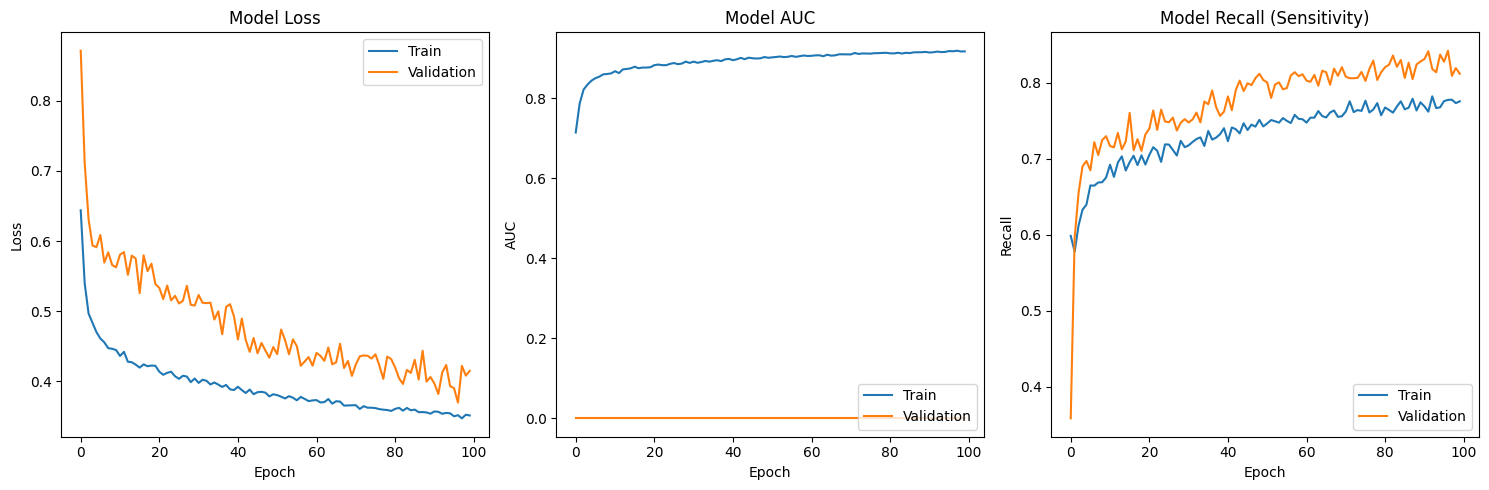

In [93]:
# Neural Network model for churn prediction
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, recall_score

# Assuming X_train_res and y_train_res are already created from SMOTE
# and X_test and y_test are your test datasets

# Standardize features for neural network (important for good performance)
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_res)
X_test_nn = scaler.transform(df_test.loc[:, df_test.columns != 'Exited'])
y_test_nn = df_test.Exited

# Build neural network model
print("Building neural network model...")
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

# Compile model with class weights to further address imbalance
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), 
             tf.keras.metrics.Recall(name='recall')]
)

# Setup early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_recall',  # Focus on recall improvement
    patience=15,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

# Train the model
print("Training neural network...")
history = nn_model.fit(
    X_train_nn, y_train_res,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Final evaluation on test set
print("Evaluating neural network on test data...")
y_proba_nn = nn_model.predict(X_test_nn).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Print metrics
print("\nNeural Network Classification Report:")
print(classification_report(y_test_nn, y_pred_nn))
print(f"Neural Network AUC: {roc_auc_score(y_test_nn, y_proba_nn):.4f}")
print(f"Sensitivity (Recall) for churn prediction: {recall_score(y_test_nn, y_pred_nn):.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot AUC
plt.subplot(1, 3, 2)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot Recall
plt.subplot(1, 3, 3)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall (Sensitivity)')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training improved neural network...
Epoch 1/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5846 - auc: 0.6409 - loss: 1.5902 - precision: 0.4680 - recall: 0.6836 - val_accuracy: 0.9099 - val_auc: 0.0000e+00 - val_loss: 0.6866 - val_precision: 1.0000 - val_recall: 0.9099 - learning_rate: 5.0000e-04
Epoch 2/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6359 - auc: 0.7522 - loss: 1.3171 - precision: 0.5090 - recall: 0.8425 - val_accuracy: 0.9225 - val_auc: 0.0000e+00 - val_loss: 0.6010 - val_precision: 1.0000 - val_recall: 0.9225 - learning_rate: 5.0000e-04
Epoch 3/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6590 - auc: 0.7874 - loss: 1.2405 - precision: 0.5322 - recall: 0.8533 - val_accuracy: 0.9182 - val_auc: 0.0000e+00 - val_loss: 0.5894 - val_precision: 1.0000 - val_recall: 0.9182 - learning_rate: 5.0000e-04
Epoch 4/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6759 - auc: 0.8068 - loss: 1.2038 - precision: 0.5371 - recall: 0.8607 -

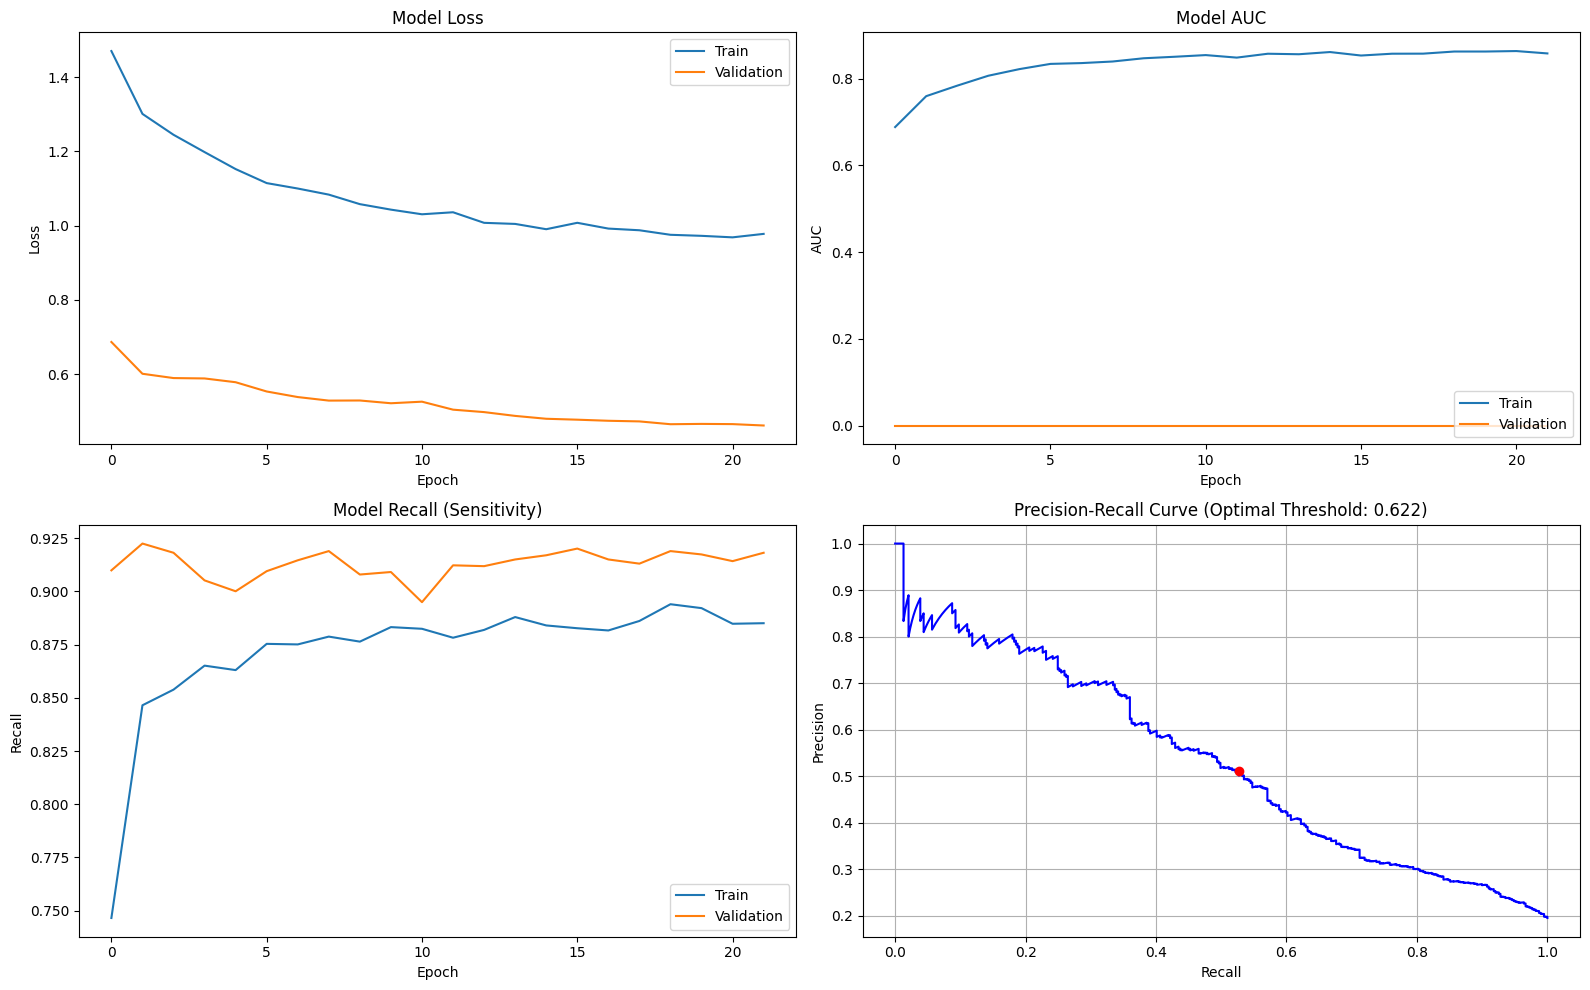

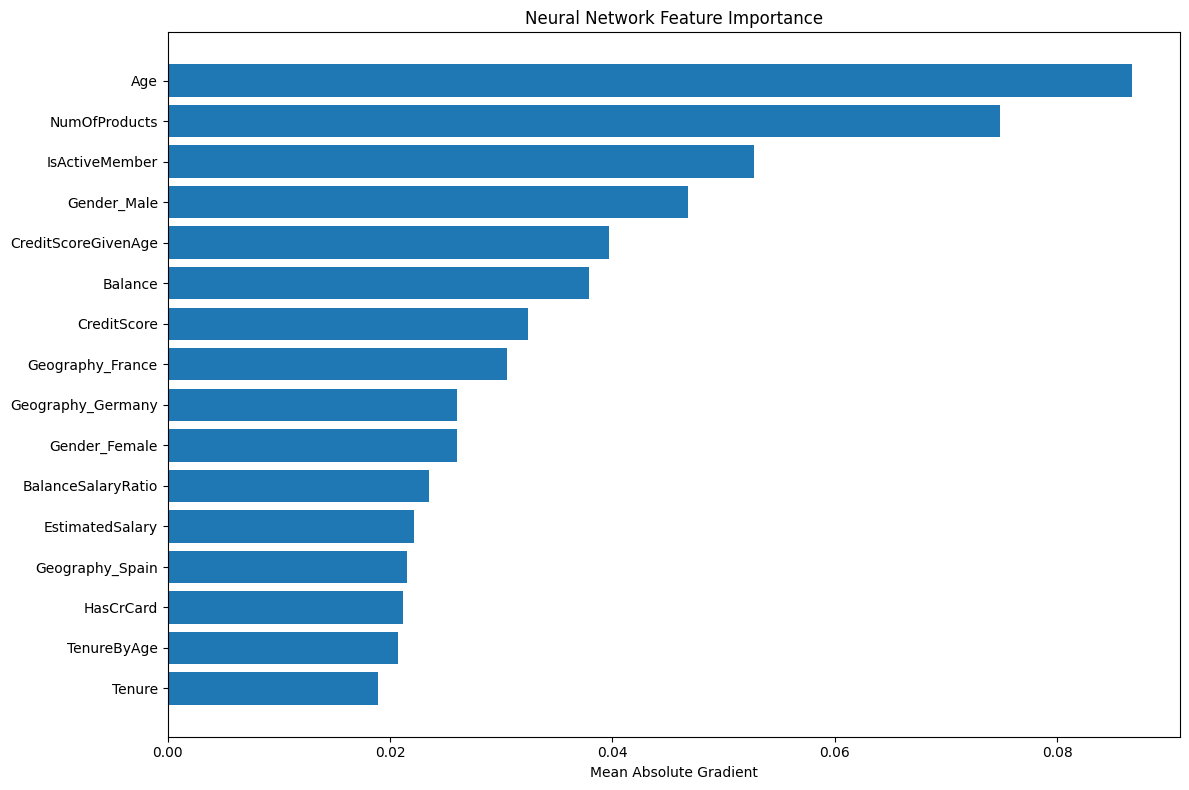

In [110]:
# Improved Neural Network for churn prediction
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_res)
X_test_nn = scaler.transform(df_test.loc[:, df_test.columns != 'Exited'])
y_test_nn = df_test.Exited

# Calculate class weights to address imbalance (even with SMOTE)
class_weight = {
    0: 1.0,
    1: 3.0  # Higher weight for minority class to further focus on churn
}

# Build improved neural network with more capacity and regularization
nn_model = Sequential([
    # First layer - more neurons with regularization
    Dense(256, activation='relu', kernel_regularizer=l2(0.001),
          input_shape=(X_train_nn.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    # Second layer
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    
    # Third layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Fourth layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile model with a slower learning rate
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', 
             tf.keras.metrics.AUC(name='auc'),
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.Precision(name='precision')]
)

# Enhanced callbacks
early_stopping = EarlyStopping(
    monitor='val_recall',
    patience=20,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_recall',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    mode='max',
    verbose=1
)

# Train with more epochs and class weights
print("Training improved neural network...")
history = nn_model.fit(
    X_train_nn, y_train_res,
    validation_split=0.2,
    epochs=200,  # More epochs with early stopping
    batch_size=32,  # Smaller batch size
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight,  # Apply class weights
    verbose=1
)

# Evaluate with threshold optimization
print("Evaluating neural network with threshold optimization...")
y_proba_nn = nn_model.predict(X_test_nn).ravel()

# Find optimal threshold based on precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_nn, y_proba_nn)
f1_scores = 2 * recall * precision / (recall + precision + 1e-10)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal threshold: {optimal_threshold:.4f}")

# Use optimal threshold for predictions
y_pred_nn = (y_proba_nn >= optimal_threshold).astype(int)

# Print metrics
print("\nImproved Neural Network Classification Report:")
print(classification_report(y_test_nn, y_pred_nn))
print(f"Improved Neural Network AUC: {roc_auc_score(y_test_nn, y_proba_nn):.4f}")
print(f"Sensitivity (Recall) for churn prediction: {recall_score(y_test_nn, y_pred_nn):.4f}")

# Plot training history
plt.figure(figsize=(16, 10))

# Plot loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot AUC
plt.subplot(2, 2, 2)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot Recall
plt.subplot(2, 2, 3)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall (Sensitivity)')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot Precision-Recall curve with optimal threshold
plt.subplot(2, 2, 4)
plt.plot(recall, precision, 'b-')
plt.plot(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], 'ro')
plt.title(f'Precision-Recall Curve (Optimal Threshold: {optimal_threshold:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

plt.tight_layout()
plt.show()

# Feature importance visualization (using gradients)
def get_feature_importance():
    # Create a model that returns gradients
    inputs = tf.keras.Input(shape=(X_train_nn.shape[1],))
    predictions = nn_model(inputs)
    grad_model = tf.keras.Model(inputs=inputs, outputs=predictions)
    
    # Calculate gradients for each feature
    with tf.GradientTape() as tape:
        inputs_tensor = tf.constant(X_test_nn, dtype=tf.float32)
        tape.watch(inputs_tensor)
        predictions = grad_model(inputs_tensor)
    
    gradients = tape.gradient(predictions, inputs_tensor)
    importance = np.abs(gradients.numpy()).mean(axis=0)
    
    return importance

# Get feature names (assuming original column order is preserved)
feature_names = [col for col in df_train.columns if col != 'Exited']

# Get feature importance
try:
    importance = get_feature_importance()
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sorted_idx = np.argsort(importance)
    plt.barh(range(len(sorted_idx)), importance[sorted_idx])
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.title('Neural Network Feature Importance')
    plt.xlabel('Mean Absolute Gradient')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not generate feature importance: {e}")

In [111]:
# Print metrics
print("\nImproved Neural Network Classification Report:")
print(classification_report(y_test_nn, y_pred_nn, digits=4))
print(f"Improved Neural Network AUC: {roc_auc_score(y_test_nn, y_proba_nn):.4f}")
print(f"Sensitivity (Recall) for churn prediction: {recall_score(y_test_nn, y_pred_nn):.4f}")


Improved Neural Network Classification Report:
              precision    recall  f1-score   support

           0     0.8846    0.8780    0.8813      1607
           1     0.5112    0.5270    0.5190       389

    accuracy                         0.8096      1996
   macro avg     0.6979    0.7025    0.7002      1996
weighted avg     0.8119    0.8096    0.8107      1996

Improved Neural Network AUC: 0.7727
Sensitivity (Recall) for churn prediction: 0.5270


In [96]:
# ───────────────────────────────────────────────────────────────
# 5) TUNE AN XGBOOST CLASSIFIER WITH OPTUNA
# ───────────────────────────────────────────────────────────────

import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 5.1) extract features & labels from your processed DataFrames
X_train = df_train.drop('Exited', axis=1).values
y_train = df_train['Exited'].values

X_valid = df_test.drop('Exited', axis=1).values
y_valid = df_test['Exited'].values

def objective(trial):
    params = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": "gbtree",
        "lambda": trial.suggest_loguniform("lambda", 1e-3, 10.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-3, 10.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
    }

    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    return 1.0 - acc  # we minimize, so lower = better

# 5.2) run the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# 5.3) report
print("▶︎ Best hyperparameters:")
for name, val in study.best_trial.params.items():
    print(f"    {name:18s} = {val}")

best_acc = 1.0 - study.best_trial.value
print(f"\n▶︎ Validation Accuracy = {best_acc:.4f}")


[I 2025-04-18 15:03:31,152] A new study created in memory with name: no-name-b8129c10-f1b1-421c-81e9-f02907563f7e
/var/folders/yy/tk2ly86d08v223l5878trg9m0000gn/T/ipykernel_22964/1329347154.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-3, 10.0),
/var/folders/yy/tk2ly86d08v223l5878trg9m0000gn/T/ipykernel_22964/1329347154.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-3, 10.0),
[I 2025-04-18 15:03:31,559] Trial 0 finished with value: 0.12975951903807614 and parameters: {'lambda': 0.20196326811008194, 'alpha': 0.009540263212349739, 'colsample_bytree': 0.93327458097289

▶︎ Best hyperparameters:
    lambda             = 0.2422217154740091
    alpha              = 0.04098407159461511
    colsample_bytree   = 0.9648262063005542
    subsample          = 0.8407379972656218
    learning_rate      = 0.030252341146756068
    n_estimators       = 287
    max_depth          = 6
    min_child_weight   = 7

▶︎ Validation Accuracy = 0.8717


In [114]:
# Get best model
best_params = study.best_trial.params
best_model = xgb.XGBClassifier(**best_params, use_label_encoder=False)
best_model.fit(X_train, y_train)

# Get predictions
y_pred = best_model.predict(X_valid)
y_proba = best_model.predict_proba(X_valid)[:, 1]

# Print classification report with 4 decimal digits
from sklearn.metrics import classification_report, roc_auc_score
print("\n▶︎ Classification Report:")
print(classification_report(y_valid, y_pred, digits=4))
print(f"AUC Score: {roc_auc_score(y_valid, y_proba):.4f}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



▶︎ Classification Report:
              precision    recall  f1-score   support

           0     0.8819    0.9708    0.9242      1607
           1     0.7930    0.4627    0.5844       389

    accuracy                         0.8717      1996
   macro avg     0.8374    0.7167    0.7543      1996
weighted avg     0.8645    0.8717    0.8580      1996

AUC Score: 0.8458


In [100]:
# pip install hyperopt
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1. Split your data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the search space
space = {
    'max_depth':        hp.choice('max_depth',        range(3, 11)),
    'learning_rate':    hp.loguniform('learning_rate', -5, 0),   # e.g. exp(uniform(-5, 0))
    'subsample':        hp.uniform('subsample',        0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'gamma':            hp.uniform('gamma',            0,   5),
    'lambda':           hp.loguniform('lambda',        -5, 2),
    'alpha':            hp.loguniform('alpha',         -5, 2),
    'n_estimators':     hp.choice('n_estimators',     [100, 200, 300, 500])
}

# 3. Define the objective
def objective(params):
    # cast choices back to int
    params['max_depth']    = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    # fixed params
    params.update({
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0
    })
    model = xgb.XGBClassifier(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=20,
        verbose=False
    )
    preds = model.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    # Hyperopt tries to minimize, so return 1 - accuracy
    return {'loss': 1 - acc, 'status': STATUS_OK}

# 4. Run the search
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,    # Tree-structured Parzen Estimator
    max_evals=50,
    trials=trials,
    rstate=np.random.RandomState(42)
)

print("Best hyperparameters:", best)


TypeError: Expected sequence or array-like, got <class 'keras.src.backend.common.keras_tensor.KerasTensor'>

In [99]:
!pip3 install hyperopt

7940.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:00a 0:00:010m
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 kB 3.9 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
